## Tsunami effect prediction
We all know that TSUNAMI is  biggest natural disaster which took the lives of many human in different countries. Science had found out different reasons or cause behind eeach Tsunamis and still its not yet confirmed. The effect of Tsunami gets vary with the underlying cause.

This dataset is about the effect of Tsunami in different countries ,its causes and the maginitude of the causes.



### Data collection

In [251]:
#importing the packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#reading the dataset to 
df=pd.read_csv('Tsunami_dataset.csv')
df.head()

,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,REGION,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY
0,-330,NaN,NaN,NaN,NaN,40.00,25.00,"E. SPORADES ISLANDS, AEGEAN ISLANDS",GREECE,Mediterranean Sea,Earthquake,Very Doubtful Tsunami,7.0,NaN,NaN
1,859,NaN,NaN,NaN,NaN,36.08,36.25,SAMANDAGI,TURKEY,Mediterranean Sea,Earthquake,Questionable Tsunami,NaN,NaN,3.0
2,1580,1.0,NaN,NaN,NaN,40.00,128.00,YELLOW SEA,NORTH KOREA,"China, North and South Korea, Philippines, Taiwan",Unknown,Very Doubtful Tsunami,NaN,NaN,1.0
3,-1300,NaN,NaN,NaN,NaN,39.96,26.24,"IONIAN COASTS, TROAD",TURKEY,Mediterranean Sea,Unknown,Questionable Tsunami,6.0,NaN,5.0
4,1556,10.0,21.0,NaN,NaN,37.00,126.00,YELLOW SEA,SOUTH KOREA,"China, North and South Korea, Philippines, Taiwan",Unknown,Very Doubtful Tsunami,NaN,NaN,0.5


### Feature understanding

1.YEAR -- year in which Tsunami occured

2.MONTH --month in which Tsunami occured

3.DAY--day on which Tsunami occured

4.HOUR--hour at which Tsunami occured

5.MINUTE--minute at which Tsunami occured

6.LATITUDE--latitude details

7.LONGITUDE--longitude details

8.LOCATION_NAME--affected location

9.COUNTRY--affected country

10.REGION--affected region

11.CAUSE--reason behind the Tsunami

12.EVENT_VALIDITY--effect of event

13.EQ_MAGNITUDE--earth quake magnitude

14.EQ_DEPTH -- earth quake depth

15.TS_INTENSITY--intensity of Tsunami


### Data analysis

In [252]:
df.shape

(2108, 15)

In [253]:
df.isnull().sum()

YEAR                 0
MONTH               58
DAY                103
HOUR               862
MINUTE             917
LATITUDE             0
LONGITUDE            0
LOCATION_NAME        4
COUNTRY              0
REGION               1
CAUSE                0
EVENT_VALIDITY       0
EQ_MAGNITUDE       471
EQ_DEPTH          1189
TS_INTENSITY       785
dtype: int64

In [254]:
df.duplicated().sum()

0

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            2108 non-null   int64  
 1   MONTH           2050 non-null   float64
 2   DAY             2005 non-null   float64
 3   HOUR            1246 non-null   float64
 4   MINUTE          1191 non-null   float64
 5   LATITUDE        2108 non-null   float64
 6   LONGITUDE       2108 non-null   float64
 7   LOCATION_NAME   2104 non-null   object 
 8   COUNTRY         2108 non-null   object 
 9   REGION          2107 non-null   object 
 10  CAUSE           2108 non-null   object 
 11  EVENT_VALIDITY  2108 non-null   object 
 12  EQ_MAGNITUDE    1637 non-null   float64
 13  EQ_DEPTH        919 non-null    float64
 14  TS_INTENSITY    1323 non-null   float64
dtypes: float64(9), int64(1), object(5)
memory usage: 247.2+ KB


## Preprocessing

In [256]:
df.isnull().sum()

YEAR                 0
MONTH               58
DAY                103
HOUR               862
MINUTE             917
LATITUDE             0
LONGITUDE            0
LOCATION_NAME        4
COUNTRY              0
REGION               1
CAUSE                0
EVENT_VALIDITY       0
EQ_MAGNITUDE       471
EQ_DEPTH          1189
TS_INTENSITY       785
dtype: int64

We can see null values are present in all fields except year,latitude, longitude,country ,cause and event_validity.

#### Handling Null values

In [257]:
#hour and minute fields having good number of null values and it wont contribute for the model,So dropping the two columns
df.drop(['HOUR','MINUTE'],axis=1,inplace=True)

In [258]:
df.shape

(2108, 13)

In [259]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'LATITUDE', 'LONGITUDE', 'LOCATION_NAME',
       'COUNTRY', 'REGION', 'CAUSE', 'EVENT_VALIDITY', 'EQ_MAGNITUDE',
       'EQ_DEPTH', 'TS_INTENSITY'],
      dtype='object')

In [260]:
#using mode of month ,day,LOCATION_NAME,REGION to fill in the missing values
for i in ['MONTH', 'DAY','LOCATION_NAME','REGION']:
    df[i]=df[i].fillna(df[i].mode()[0])

In [261]:
df.isnull().sum()

YEAR                 0
MONTH                0
DAY                  0
LATITUDE             0
LONGITUDE            0
LOCATION_NAME        0
COUNTRY              0
REGION               0
CAUSE                0
EVENT_VALIDITY       0
EQ_MAGNITUDE       471
EQ_DEPTH          1189
TS_INTENSITY       785
dtype: int64

eventhough the EQ_DEPTH field is having good number of null values,it cannot be dropped as we think it contributes to the tsunami effect


In [262]:
#filling the missing values of remaining EQ_DEPTH fields with 0s
df['EQ_DEPTH']=df['EQ_DEPTH'].fillna(0)

In [263]:
df.isnull().sum()

YEAR                0
MONTH               0
DAY                 0
LATITUDE            0
LONGITUDE           0
LOCATION_NAME       0
COUNTRY             0
REGION              0
CAUSE               0
EVENT_VALIDITY      0
EQ_MAGNITUDE      471
EQ_DEPTH            0
TS_INTENSITY      785
dtype: int64

In [264]:
#filling the eq_magnitude and ts_intensity fields with median
for i in ['EQ_MAGNITUDE','TS_INTENSITY']:
    df[i]=df[i].fillna(df[i].median())

In [265]:
df.isnull().sum()

YEAR              0
MONTH             0
DAY               0
LATITUDE          0
LONGITUDE         0
LOCATION_NAME     0
COUNTRY           0
REGION            0
CAUSE             0
EVENT_VALIDITY    0
EQ_MAGNITUDE      0
EQ_DEPTH          0
TS_INTENSITY      0
dtype: int64

Null values are handled in all fields

### Feature Engineering and Feature reduction 

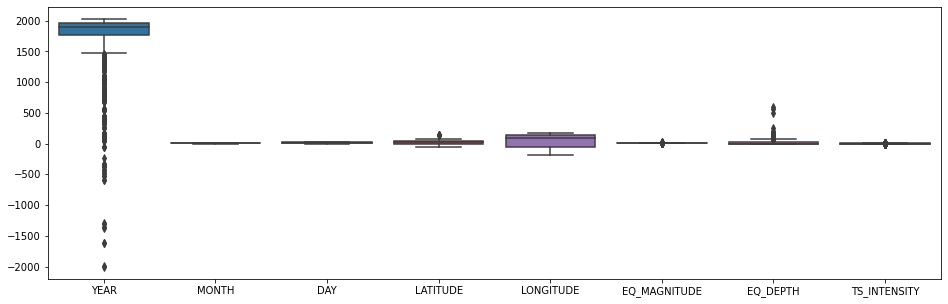

In [266]:
# Plotting the data using boxplots
plt.figure(figsize=(16,5))
sns.boxplot(data=df)

We can see some negative abrupt values in the year field, so filtering the data from the datset from 17th century onwards

In [267]:
df=df[df.YEAR>=1600]

In [268]:
df.shape

(1866, 13)

In [269]:
df.head()

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,REGION,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY
5,1747,3.0,1.0,33.100,139.800,"IZU PENINSULA, HACHIJO ISLAND",JAPAN,Japan,Unknown,Questionable Tsunami,7.1,0.0,0.5
6,1704,8.0,1.0,33.600,136.000,"TAIJI, KII",JAPAN,Japan,Unknown,Questionable Tsunami,7.1,0.0,1.0
9,1650,9.0,29.0,36.404,25.396,THERA ISLAND (SANTORINI),GREECE,Mediterranean Sea,Volcano and Landslide,Definite Tsunami,6.3,0.0,6.0
11,1676,8.0,1.0,38.733,-27.066,AZORES,PORTUGAL,Northeast Atlantic Ocean,Earthquake,Very Doubtful Tsunami,7.1,0.0,1.0
15,1636,7.0,31.0,35.100,129.050,E. CHINA SEA-S.JAPAN,EAST CHINA SEA,"China, North and South Korea, Philippines, Taiwan",Unknown,Very Doubtful Tsunami,7.1,0.0,0.0


In [270]:
#COnverting YEAR,MONTH and DAY into int
for i in ['DAY','MONTH','YEAR']:
    df[i] =  df[i].astype(int) 


In [271]:
df_eda=df.copy()

In [272]:
#concatenating day,month and year fields to a single field called DATE
df['DATE'] = df['DAY'].map(str) + '-' + df['MONTH'].map(str) + '-' + df['YEAR'].map(str)

In [273]:
#dropping YEAR,MONTH and DATE fields
df.drop(['DAY','MONTH','YEAR'],axis=1,inplace=True)

In [274]:
df.shape

(1866, 11)

### Checking for outliers and handling outliers

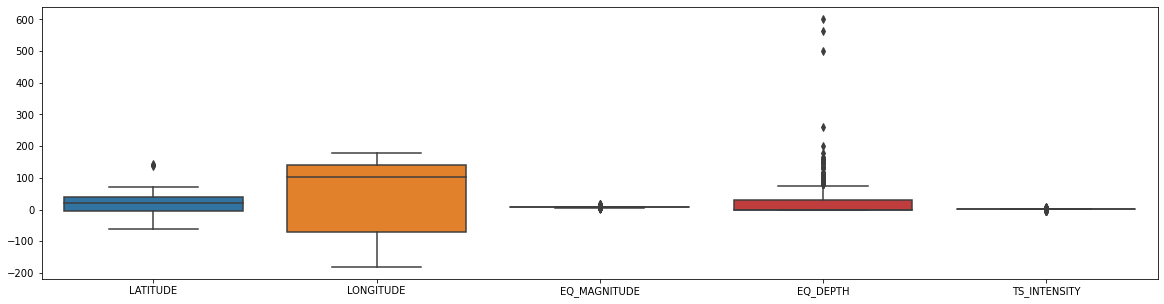

In [275]:
# checking whether there is any outliers present in the dataset for any feature
plt.figure(figsize=(20,5))
sns.boxplot(data=df)

We could see outliers are present in LATITUDE and EQ_DEPTH columns

In [276]:
#Handling outlier in LATITUDE field
Q1=np.percentile(df['LATITUDE'],25)
Q2=np.percentile(df['LATITUDE'],50)
Q3=np.percentile(df['LATITUDE'],75)

IQR = Q3-Q1

UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

print('Lower limit is :',LL)
print('Upper limit is :',UL)

Lower limit is : -71.35
Upper limit is : 104.25


In [277]:
outlier = []
for i in df['LATITUDE']:
    if ((i>UL) | (i<LL)):
        outlier.append(i)

In [278]:
outlier

[138.11700000000002, 139.033, 142.467]

In [279]:
#all outliers are above Upper limit
ind = df[(df['LATITUDE'] > UL)]
df.drop(ind.index,inplace=True)

In [280]:
#Handling outliers in EQ_DEPTH field
Q1=np.percentile(df['EQ_DEPTH'],25)
Q2=np.percentile(df['EQ_DEPTH'],50)
Q3=np.percentile(df['EQ_DEPTH'],75)

IQR = Q3-Q1

UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

print('Lower limit is :',LL)
print('Upper limit is :',UL)

Lower limit is : -45.0
Upper limit is : 75.0


In [281]:
outlier1 = []
for i in df['EQ_DEPTH']:
    if ((i>UL) | (i<LL)):
        outlier.append(i)

In [282]:
ind = df[(df['EQ_DEPTH'] < LL) | (df['EQ_DEPTH'] > UL)]
df.drop(ind.index,inplace=True)

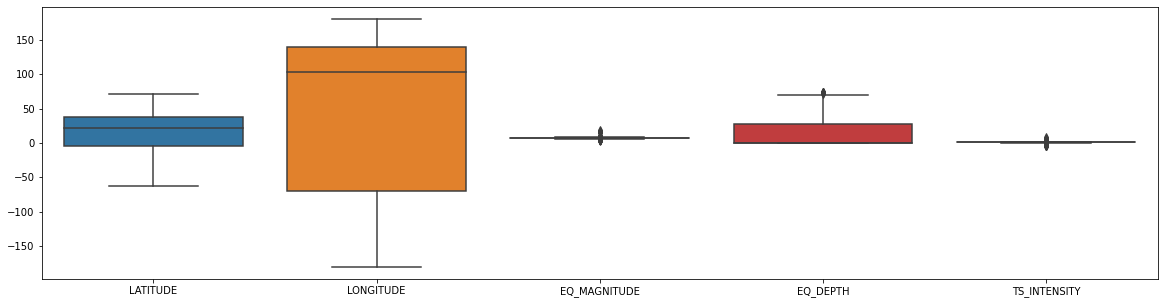

In [283]:
# replotting the boxplot to check whether outliers are handled
plt.figure(figsize=(20,5))
sns.boxplot(data=df)

In [284]:
df.shape

(1800, 11)

In [285]:
df.head()

,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,REGION,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY,DATE
5,33.100,139.800,"IZU PENINSULA, HACHIJO ISLAND",JAPAN,Japan,Unknown,Questionable Tsunami,7.1,0.0,0.5,1-3-1747
6,33.600,136.000,"TAIJI, KII",JAPAN,Japan,Unknown,Questionable Tsunami,7.1,0.0,1.0,1-8-1704
9,36.404,25.396,THERA ISLAND (SANTORINI),GREECE,Mediterranean Sea,Volcano and Landslide,Definite Tsunami,6.3,0.0,6.0,29-9-1650
11,38.733,-27.066,AZORES,PORTUGAL,Northeast Atlantic Ocean,Earthquake,Very Doubtful Tsunami,7.1,0.0,1.0,1-8-1676
15,35.100,129.050,E. CHINA SEA-S.JAPAN,EAST CHINA SEA,"China, North and South Korea, Philippines, Taiwan",Unknown,Very Doubtful Tsunami,7.1,0.0,0.0,31-7-1636


In [286]:
df_eda.shape

(1866, 13)

### Feature reduction

In [287]:
df['DATE'].nunique()

1752

In [288]:
#date fields are having unique values in almost all rows, so dropping the date field
df.drop('DATE',axis=1,inplace=True)

In [289]:
df.head(2)

,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,REGION,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY
5,33.1,139.8,"IZU PENINSULA, HACHIJO ISLAND",JAPAN,Japan,Unknown,Questionable Tsunami,7.1,0.0,0.5
6,33.6,136.0,"TAIJI, KII",JAPAN,Japan,Unknown,Questionable Tsunami,7.1,0.0,1.0


In [290]:
#Since latitude and longitude are given, location_name,country and region can be dropped
df.drop(['LOCATION_NAME','COUNTRY','REGION'],axis=1,inplace=True)

In [291]:
df.shape

(1800, 7)

In [292]:
df.head()

,LATITUDE,LONGITUDE,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY
5,33.100,139.800,Unknown,Questionable Tsunami,7.1,0.0,0.5
6,33.600,136.000,Unknown,Questionable Tsunami,7.1,0.0,1.0
9,36.404,25.396,Volcano and Landslide,Definite Tsunami,6.3,0.0,6.0
11,38.733,-27.066,Earthquake,Very Doubtful Tsunami,7.1,0.0,1.0
15,35.100,129.050,Unknown,Very Doubtful Tsunami,7.1,0.0,0.0


In [293]:
#resetting the index
df = df.reset_index(drop=True)

In [294]:
df.head()

,LATITUDE,LONGITUDE,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY
0,33.100,139.800,Unknown,Questionable Tsunami,7.1,0.0,0.5
1,33.600,136.000,Unknown,Questionable Tsunami,7.1,0.0,1.0
2,36.404,25.396,Volcano and Landslide,Definite Tsunami,6.3,0.0,6.0
3,38.733,-27.066,Earthquake,Very Doubtful Tsunami,7.1,0.0,1.0
4,35.100,129.050,Unknown,Very Doubtful Tsunami,7.1,0.0,0.0


### Encoding 

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LATITUDE        1800 non-null   float64
 1   LONGITUDE       1800 non-null   float64
 2   CAUSE           1800 non-null   object 
 3   EVENT_VALIDITY  1800 non-null   object 
 4   EQ_MAGNITUDE    1800 non-null   float64
 5   EQ_DEPTH        1800 non-null   float64
 6   TS_INTENSITY    1800 non-null   float64
dtypes: float64(5), object(2)
memory usage: 98.6+ KB


In [296]:
#here we have to encode the EVENT_VALIDITY and CAUSE fields
df['EVENT_VALIDITY'].value_counts()

Definite Tsunami                                                     860
Questionable Tsunami                                                 328
Probable Tsunami                                                     281
Very Doubtful Tsunami                                                244
Event that only caused a seiche or disturbance in an inland river     87
Name: EVENT_VALIDITY, dtype: int64

In [297]:
#encoding the EVENT_VALIDITY field with label encoder

#importing the label encoder
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['EVENT_VALIDITY'] = en.fit_transform(df['EVENT_VALIDITY'])

In [298]:
df['EVENT_VALIDITY'].value_counts()

0    860
3    328
2    281
4    244
1     87
Name: EVENT_VALIDITY, dtype: int64

In [299]:
df.head()

,LATITUDE,LONGITUDE,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY
0,33.100,139.800,Unknown,3,7.1,0.0,0.5
1,33.600,136.000,Unknown,3,7.1,0.0,1.0
2,36.404,25.396,Volcano and Landslide,0,6.3,0.0,6.0
3,38.733,-27.066,Earthquake,4,7.1,0.0,1.0
4,35.100,129.050,Unknown,4,7.1,0.0,0.0


In [300]:
#encoding the CAUSE field with 
df['CAUSE'].value_counts()

Earthquake                  1504
Earthquake and Landslide      89
Unknown                       71
Volcano                       54
Landslide                     48
Meteorological                15
Volcano and Earthquake        10
Volcano and Landslide          8
Questionable Earthquake        1
Name: CAUSE, dtype: int64

In [301]:
#since the cause 'unknown' is present and in less number, we can filter the dataset
df=df[df['CAUSE'] !='Unknown']

In [302]:
df['CAUSE'].value_counts()

Earthquake                  1504
Earthquake and Landslide      89
Volcano                       54
Landslide                     48
Meteorological                15
Volcano and Earthquake        10
Volcano and Landslide          8
Questionable Earthquake        1
Name: CAUSE, dtype: int64

In [303]:
df.shape

(1729, 7)

In [304]:
#using label encoder for encoding the CAUSE field as the categories are more and one hot encoder takes more computational space
le = LabelEncoder()
df['CAUSE'] = en.fit_transform(df['CAUSE'])

In [305]:
df['CAUSE'].value_counts()

0    1504
1      89
5      54
2      48
3      15
6      10
7       8
4       1
Name: CAUSE, dtype: int64

In [306]:
df.head()

,LATITUDE,LONGITUDE,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY
2,36.404,25.396,7,0,6.3,0.0,6.0
3,38.733,-27.066,0,4,7.1,0.0,1.0
5,39.500,20.000,0,3,7.1,0.0,2.0
6,-6.174,106.829,0,4,7.1,0.0,0.0
7,-5.000,102.000,0,2,7.0,0.0,0.5


Standardization/Normalization will be done after splitting dataset into X and Y train and test

### Exploratory data analysis

#### Univariate analysis

Analysing the data in individual features 

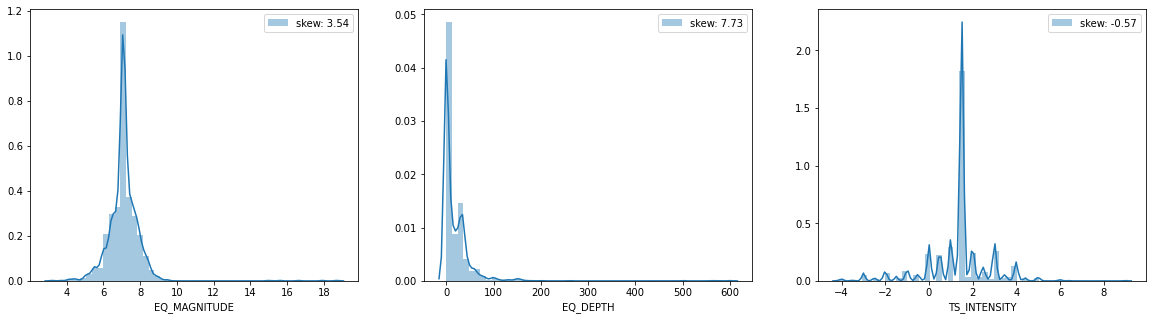

In [307]:
#using the copied dataset df_eda in exploratory analysis
import warnings
warnings.filterwarnings('ignore')

#plotting the distribution and skewness of EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY features

plt.figure(figsize=(20,5))
plt.subplot(131)
sns.distplot(df_eda['EQ_MAGNITUDE'],label='skew: '+ str(np.round(df_eda['EQ_MAGNITUDE'].skew(),2)))
plt.legend()
plt.subplot(132)
sns.distplot(df_eda['EQ_DEPTH'],label='skew: '+ str(np.round(df_eda['EQ_DEPTH'].skew(),2)))
plt.legend()
plt.subplot(133)
sns.distplot(df_eda['TS_INTENSITY'],label='skew: '+ str(np.round(df_eda['TS_INTENSITY'].skew(),2)))
plt.legend()
plt.show()

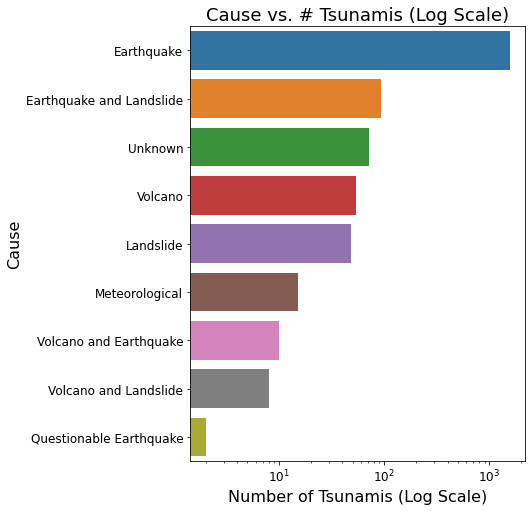

In [308]:
#plotting the number of Tsunamis occured due to different cause
plt.figure(figsize=(6,8))
ax = sns.countplot(y="CAUSE", data=df_eda, order=df_eda["CAUSE"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Cause vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Cause",fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

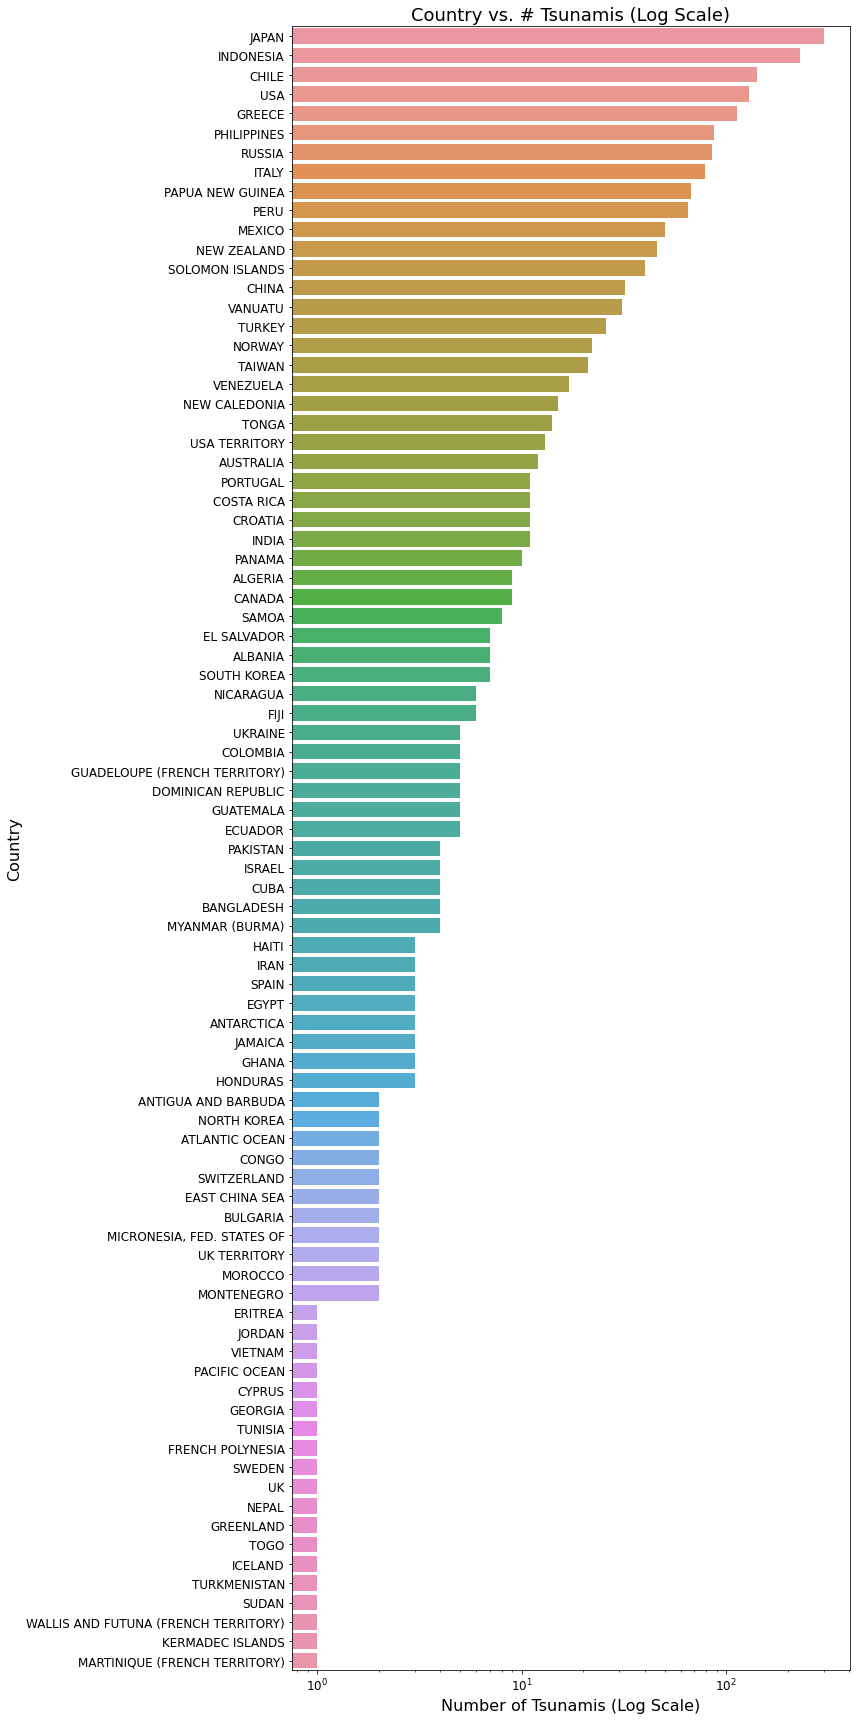

In [309]:
#plotting the number of Tsunamis occured in different countries
plt.figure(figsize=(12,24))
ax = sns.countplot(y="COUNTRY", data=df_eda, order=df_eda["COUNTRY"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Country vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

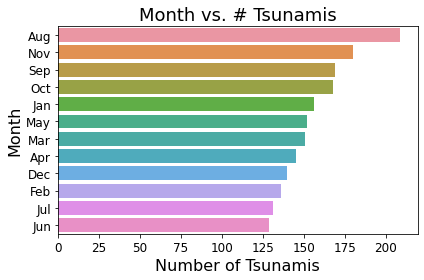

In [311]:
#plotting the month in which Tsunamis are occuring more

plt.figure(figsize=(6,4))
month_idxs = np.array(list(map(lambda x: int(x), df_eda["MONTH"].value_counts().keys().tolist())))-1
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months = list(map(month_names.__getitem__, month_idxs))
ax = sns.countplot(y="MONTH", data=df_eda, order=df_eda["MONTH"].value_counts().index)
ax.axes.set_title("Month vs. # Tsunamis",fontsize=18)
ax.set_xlabel("Number of Tsunamis",fontsize=16)
ax.set_ylabel("Month",fontsize=16)
ax.tick_params(labelsize=12)
ax.set_yticklabels(months, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

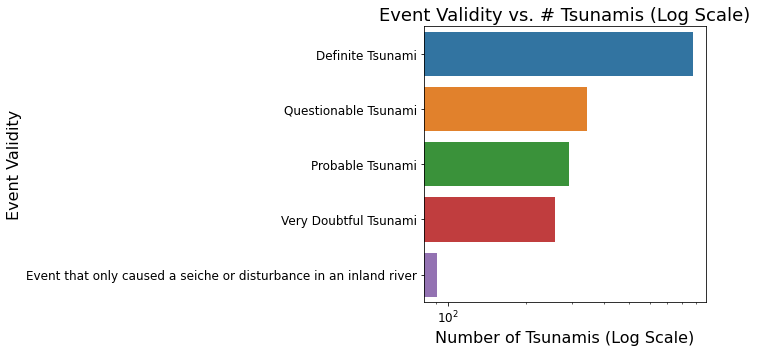

In [312]:
#plotting the occurence of event validity/Tsunami effect

plt.figure(figsize=(10,5))
ax = sns.countplot(y="EVENT_VALIDITY", data=df_eda, order=df_eda["EVENT_VALIDITY"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Event Validity vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Event Validity",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

#### Bivariate analysis

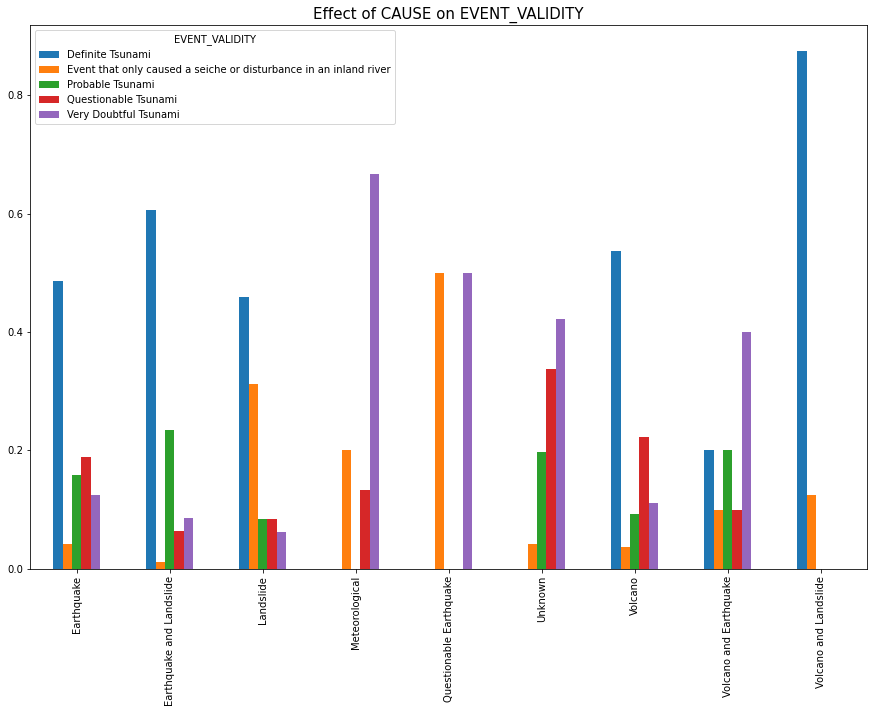

In [322]:
#plotting the effect of cause on event validity

plt.rcParams['figure.figsize'] = (15, 10)
x = pd.crosstab(df_eda['CAUSE'], df_eda['EVENT_VALIDITY'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of CAUSE on EVENT_VALIDITY', fontsize = 15)
plt.xlabel(' ')
plt.show()

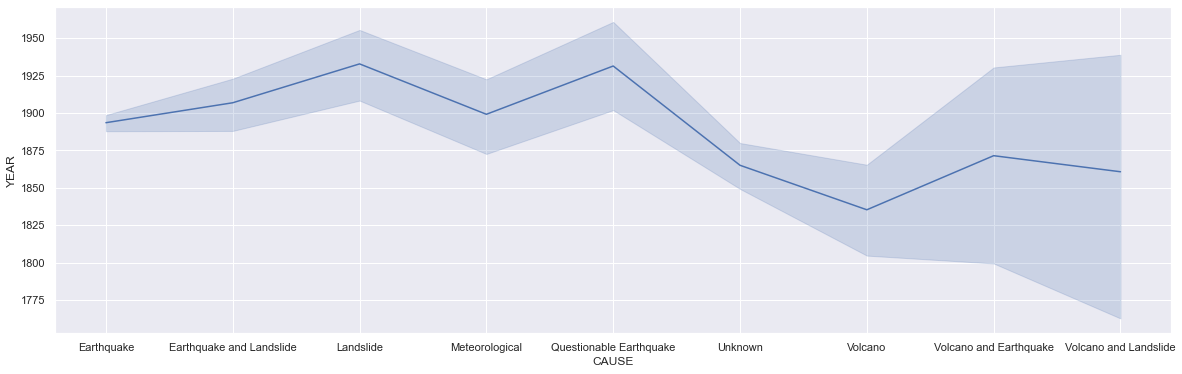

In [326]:
#plotting the line graph of the occurence of CAUSE over the years
sns.set(rc = {'figure.figsize' : (20,6)})
sns.lineplot(x= "CAUSE", y = "YEAR", data = df_eda)
plt.show()

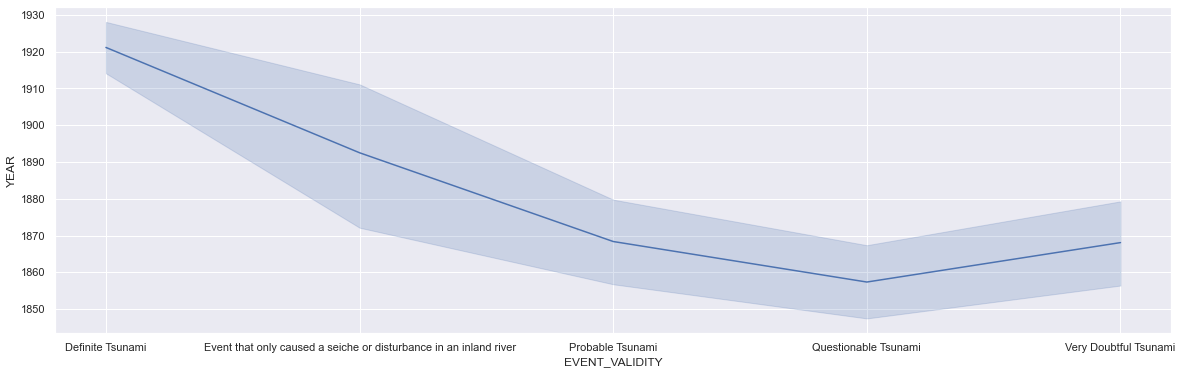

In [327]:
sns.set(rc = {'figure.figsize' : (20,6)})
sns.lineplot(x= "EVENT_VALIDITY", y = "YEAR", data = df_eda)
plt.show()

From the above line graphs its clear that, Tsunamis due to earthquake and lanslide is more in the 20th century. The impact of Tsunami was high in the 20th century that too in the years 1920 to 1930. In the 19th century there were Tsunamis but the effect/impact was very less or doubtful and the cause was due to the volcanoes. 

### Modelling

In [331]:
df.head()

,LATITUDE,LONGITUDE,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY
2,36.404,25.396,7,0,6.3,0.0,6.0
3,38.733,-27.066,0,4,7.1,0.0,1.0
5,39.500,20.000,0,3,7.1,0.0,2.0
6,-6.174,106.829,0,4,7.1,0.0,0.0
7,-5.000,102.000,0,2,7.0,0.0,0.5


In [423]:
#This is a classification model which use to predict the event_validity of the Tsunami

#splitting the dataset into X and y
X=df.drop('EVENT_VALIDITY',axis=1)
y=df['EVENT_VALIDITY']

In [424]:
#importing train_test_split and creating train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [425]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [426]:
#creating the empty list to display the accuracy and f1 score after running all models
models=['RandomForest','LogisticRegression','DecisionTree','SVC','KNN']
model_test_acc=[]
model_test_f1_score = []
model_test_precision_score =[]
model_test_recall_score =[]

#### Random Forest Model

In [427]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred),3)
test_f1 =  np.round(f1_score(y_test,y_pred,average='weighted'),3)
#test_prec = np.round(recall_score(y_test, y_pred,average='weighted'),3)
#test_recall = np.round(precision_score(y_test, y_pred,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
#model_test_precision_score(test_prec)
#model_test_recall_score(test_recall)

print("F1 Score on test data using RandomForest tree: ",test_f1)
print("Accuracy Score on test data using RandomForest tree: ",test_acc)
#print("Recall score on  test data using RandomForest tree: ",test_prec)
#print("Precision score on test data using RandomForest tree: ",test_recall)

F1 Score on test data using RandomForest tree:  0.547
Accuracy Score on test data using RandomForest tree:  0.561


In [428]:
test_prec = np.round(recall_score(y_test, y_pred,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred,average='weighted'),3)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)
print("Recall score on  test data using RandomForest tree: ",test_prec)
print("Precision score on test data using RandomForest tree: ",test_recall)

Recall score on  test data using RandomForest tree:  0.561
Precision score on test data using RandomForest tree:  0.54


#### Logistic Regression Model

In [429]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred1),3)
test_f1 =  np.round(f1_score(y_test,y_pred1,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred1,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred1,average='weighted'),3)

model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)


print("F1 Score on test data using LogisticRegression: ",test_f1)
print("Accuracy Score on test data using LogisticRegression: ",test_acc)
print("Recall score on  test data using LogisticRegression : ",test_prec)
print("Precision score on test data using LogisticRegression : ",test_recall)

F1 Score on test data using LogisticRegression:  0.394
Accuracy Score on test data using LogisticRegression:  0.526
Recall score on  test data using LogisticRegression :  0.526
Precision score on test data using LogisticRegression :  0.357


#### Decision Tree Model

In [430]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred2 = tree.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred2),3)
test_f1 =  np.round(f1_score(y_test,y_pred2,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred2,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred2,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using DecisionTree: ",test_f1)
print("Accuracy Score on test data using DecisionTree: ",test_acc)
print("Recall score on  test data using DecisionTree : ",test_prec)
print("Precision score on test data using DecisionTree : ",test_recall)

F1 Score on test data using DecisionTree:  0.527
Accuracy Score on test data using DecisionTree:  0.52
Recall score on  test data using DecisionTree :  0.52
Precision score on test data using DecisionTree :  0.544


#### SVC Model

In [431]:
svm= SVC()
svm.fit(X_train,y_train)
y_pred3 = svm.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred3),3)
test_f1 =  np.round(f1_score(y_test,y_pred3,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred3,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred3,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using SVM: ",test_f1)
print("Accuracy Score on test data using SVM: ",test_acc)
print("Recall score on  test data using SVM : ",test_prec)
print("Precision score on test data using SVM : ",test_recall)

F1 Score on test data using SVM:  0.401
Accuracy Score on test data using SVM:  0.523
Recall score on  test data using SVM :  0.523
Precision score on test data using SVM :  0.341


#### KNN

In [432]:
accuracy = []
neighbors = np.arange(1,12)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred4 = classifier.predict(X_test)
    acc = accuracy_score(y_pred4,y_test)
    accuracy.append(acc)

In [433]:
accuracy

[0.4479768786127168,
 0.5144508670520231,
 0.5057803468208093,
 0.523121387283237,
 0.523121387283237,
 0.5115606936416185,
 0.5115606936416185,
 0.5260115606936416,
 0.5404624277456648,
 0.523121387283237,
 0.546242774566474]

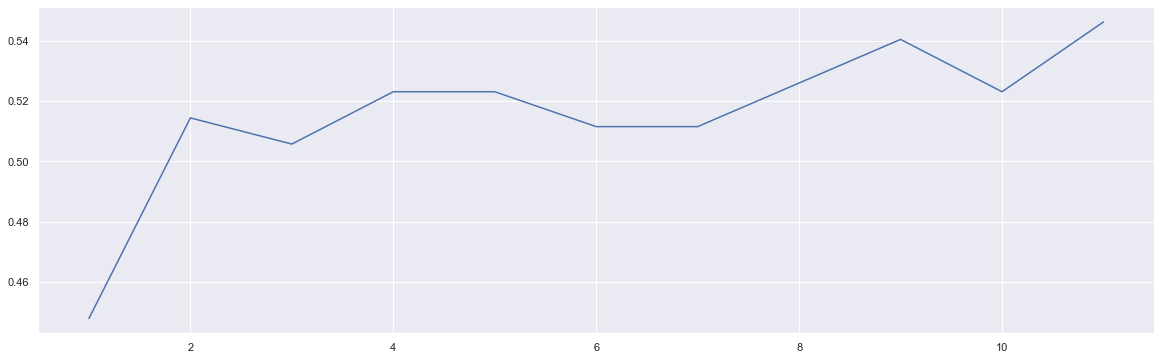

In [434]:
sns.lineplot(x=neighbors,y=accuracy)

In [435]:
#Since accuracy score is good for 11, we can select 11 as k

classifier = KNeighborsClassifier(n_neighbors=11, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred5 = classifier.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred5),3)
test_f1 =  np.round(f1_score(y_test,y_pred5,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred5,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred5,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using KNN: ",test_f1)
print("Accuracy Score on test data using KNN: ",test_acc)
print("Recall score on  test data using SVM : ",test_prec)
print("Precision score on test data using SVM : ",test_recall)

F1 Score on test data using KNN:  0.522
Accuracy Score on test data using KNN:  0.546
Recall score on  test data using SVM :  0.546
Precision score on test data using SVM :  0.519


In [436]:
#displaying the accuracy and f1 score of each models
model_performance = pd.DataFrame({
    'model':models,
    'f1_score':model_test_f1_score,
    'accuracy':model_test_acc,
    'Recall_score':model_test_precision_score,
    'Precision_score':model_test_recall_score
})
model_performance

,model,f1_score,accuracy,Recall_score,Precision_score
0,RandomForest,0.547,0.561,0.561,0.540
1,LogisticRegression,0.394,0.526,0.526,0.357
2,DecisionTree,0.527,0.520,0.520,0.544
3,SVC,0.401,0.523,0.523,0.341
4,KNN,0.522,0.546,0.546,0.519


RandomForestClassifier gives the good score in f1_score,accuracy,recall_score and precision

### Standardization/Normalization
trying to scale the data and checking whether there is any improvemnt in the model scores

In [448]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize

In [504]:
X=df.drop(['EVENT_VALIDITY'],axis=1)
y=df['EVENT_VALIDITY']

In [506]:
ss=StandardScaler()
X=ss.fit_transform(X)
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,0.711895,-0.211853,5.743736,-0.903827,-0.783706,3.358011
1,0.797297,-0.710251,-0.310121,-0.008287,-0.783706,-0.287811
2,0.825422,-0.263116,-0.310121,-0.008287,-0.783706,0.441353
3,-0.849392,0.561774,-0.310121,-0.008287,-0.783706,-1.016976
4,-0.806343,0.515898,-0.310121,-0.120230,-0.783706,-0.652393


In [507]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#scaled=scaled_data.round(decimals=3)
#scaled.head()

In [508]:
#Random Classifier Model and fitting after scaling using minmaxscaler

rf=RandomForestClassifier()
model=rf.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

print('Test Accuracy:',accuracy_score(y_test,y_pred))
print('F1_score:',f1_score(y_test,y_pred,average='weighted'))
print('Recall_score:',recall_score(y_test,y_pred,average='weighted'))
print('Precision_score:',precision_score(y_test,y_pred,average='weighted'))

Test Accuracy: 0.5722543352601156
F1_score: 0.5564230471440694
Recall_score: 0.5722543352601156
Precision_score: 0.5466955684007707


In [509]:
tree1 = DecisionTreeClassifier()
tree1.fit(X_train,y_train)
y_pred2 = tree1.predict(X_test)

print('Test Accuracy:',accuracy_score(y_test,y_pred2))
print('F1_score:',f1_score(y_test,y_pred2,average='weighted'))
print('Recall_score:',recall_score(y_test,y_pred2,average='weighted'))
print('Precision_score:',precision_score(y_test,y_pred2,average='weighted'))

Test Accuracy: 0.5404624277456648
F1_score: 0.5430876072557183
Recall_score: 0.5404624277456648
Precision_score: 0.5529437270018563


In [510]:
lr1 = LogisticRegression(max_iter=200)
lr1.fit(X_train,y_train)
y_pred1 = lr1.predict(X_test)

print('Test Accuracy:',accuracy_score(y_test,y_pred1))
print('F1_score:',f1_score(y_test,y_pred1,average='weighted'))
print('Recall_score:',recall_score(y_test,y_pred1,average='weighted'))
print('Precision_score:',precision_score(y_test,y_pred1,average='weighted'))

Test Accuracy: 0.546242774566474
F1_score: 0.4314738484104217
Recall_score: 0.546242774566474
Precision_score: 0.37423104743981206


Even after scaling, there is only slight increase in the scores using Randomforest.

### Model Tuning

In [516]:
rfc1 = RandomForestClassifier(criterion='gini',n_estimators=100,min_samples_split=100,
                              min_samples_leaf=1,max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
rfc1.fit(X_train, y_train)
y_pred0= rfc1.predict(X_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred0))
print('Recall Score is:', recall_score(y_test, y_pred0,average='weighted'))
print('Precision Score:', precision_score(y_test, y_pred0,average='weighted'))
print('F1 score is:', f1_score(y_test, y_pred0,average='weighted'))

Accuracy Score is: 0.6040462427745664
Recall Score is: 0.6040462427745664
Precision Score: 0.6015074253724064
F1 score is: 0.5315997532413568


With parameter tuning, the accuracy has got improved in randomforest calssifier.Hence this can be taken as the best model among others